In [112]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [115]:
# Read in data 
income_brackets2015 = pd.read_csv("./datasets/income_bracket_wa copy_cleaned.csv")
print(list(income_brackets2015))
# income_brackets2015

['ZIP\rcode [1]', 'Size of adjusted gross income', 'Number of returns', 'Number of single returns', 'Number of joint returns', 'Number of head of household returns', "Number with paid preparer's signature", 'Number of exemptions', 'Number of dependents', 'Number of volunteer prepared returns [2]', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Number of refund anticipation loan returns', 'Number of refund anticipation check returns', 'Number of elderly returns [3]', 'Adjusted gross income (AGI) [4]', 'Total income', 'Unnamed: 18', 'Salaries and wages in AGI', 'Unnamed: 20', 'Taxable interest', 'Unnamed: 22', 'Ordinary dividends', 'Unnamed: 24', 'Qualified dividends [5]', 'Unnamed: 26', 'State and local income tax refunds\r', 'Unnamed: 28', 'Business or profession\rnet income (less loss)', 'Unnamed: 30', 'Net capital gain (less loss) in AGI', 'Unnamed: 32', 'Taxable individual retirement\rarrangement distributions', 'Unnamed: 34', 'Pensions and annuities in AGI', 'Unnamed: 36', 'Number o

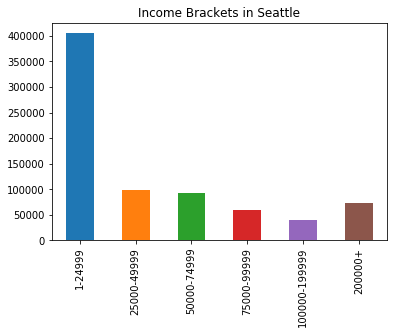

In [117]:
# Transform into two dimensional table
income_brackets2015 = income_brackets2015.rename(columns={'ZIP\rcode [1]': 'zip_code', 
                                                          'Size of adjusted gross income': 'income', 
                                                          'Number of returns': 'returns'})
# income_brackets2015


# seattle_zips = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98111, 
#                 98112, 98113, 98114, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 
#                 98124, 98125, 98126, 98127, 98129, 98131, 98132, 98133, 98134, 98136, 
#                 98138, 98139, 98141, 98144, 98145, 98146, 98148, 98151, 98154, 98155, 
#                 98158, 98160, 98161, 98164, 98165, 98166, 98168, 98170, 98171, 98174, 
#                 98175, 98177, 98178, 98181, 98184, 98185, 98188, 98189, 98190, 98191, 
#                 98194, 98195, 98198, 98199, 98110]
seattle_zips = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 
         98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98134, 98136, 
         98144, 98146, 98154, 98164, 98174, 98177, 98178, 98195, 98199]
seattle_income_brackets = income_brackets2015[income_brackets2015["zip_code"].isin(seattle_zips)]
# print(seattle_income_brackets)

# # want 
# # zip_code | 1 - 24999 | 25000 ....
# # 99999      number

# LITERAL GARBAGE USER BEWARE
from collections import defaultdict
import math
zips = defaultdict(list)
zips_df = d = {'zip_code': [], '1-24999': [], '25000-49999': [], '50000-74999': [], '75000-99999': [], '100000-199999': [], '200000+': [] }
# for index, row in seattle_income_brackets.iterrows():
row_iterator = seattle_income_brackets.iterrows()
for i, row in row_iterator:
    if row['income'] is not 'nan':
        if row['returns'] == "**":
            zips[row['zip_code']].append(0)
        else:
            zips[int(row['zip_code'])].append(row['returns'].replace(',', ''))
for k, v in zips.items():
#     print(k,v)
    zips_df['zip_code'].append(k)
    zips_df['1-24999'].append(int(v[0]))
    zips_df['25000-49999'].append(int(v[1]))
    zips_df['50000-74999'].append(int(v[2]))
    zips_df['75000-99999'].append(int(v[3]))
    zips_df['100000-199999'].append(int(v[4]))
    zips_df['200000+'].append(int(v[5]))
    
df = pd.DataFrame(data=zips_df)
sum_bracket = df.sum(axis=0)
sum_bracket = sum_bracket.drop(['zip_code'])
new_index= ['1-24999', '25000-49999', '50000-74999', '75000-99999','100000-199999', '200000+']
sum_bracket = sum_bracket.reindex(new_index)
# sum_bracket
sum_bracket.plot(kind='bar')
plt.title("Income Brackets in Seattle")
plt.show()
    